In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Считайте датасет из файла train.csv (это данные о выживаемости на Титанике) - 1 балл

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/MyDrive/train.csv',sep=',')
df.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch - 2 балла

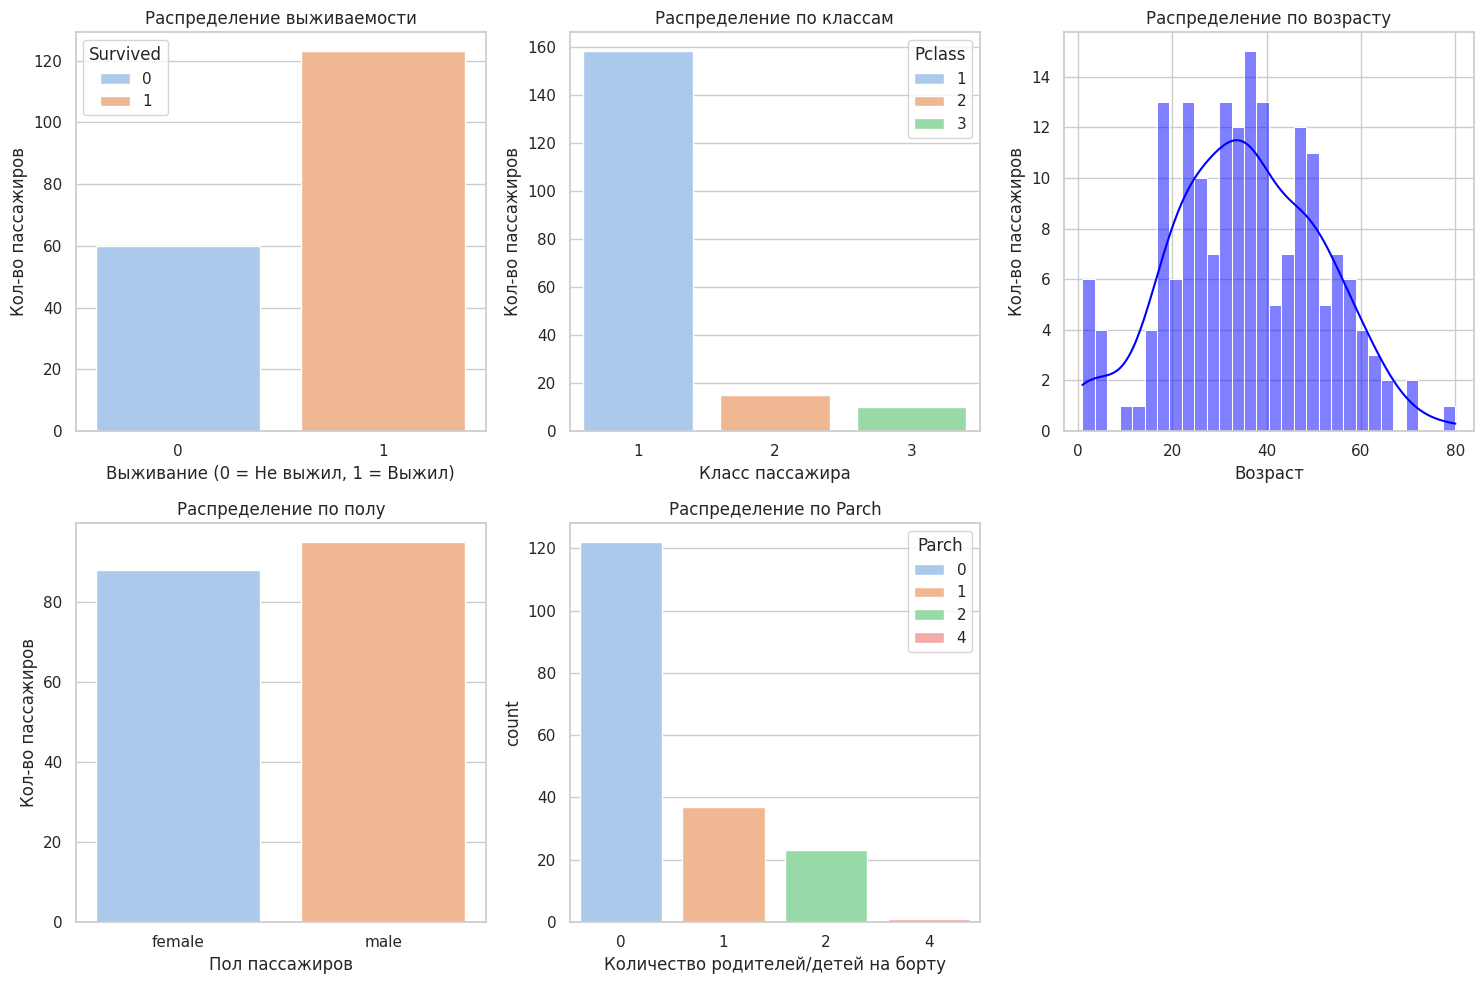

In [ ]:
df = df.dropna()
# Настройка стиля seaborn
sns.set(style="whitegrid")

# Создание графиков
plt.figure(figsize=(15, 10))

# График распределения 'Survived'
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Survived', palette='pastel', hue = 'Survived')
plt.title('Распределение выживаемости')
plt.xlabel('Выживание (0 = Не выжил, 1 = Выжил)')
plt.ylabel('Кол-во пассажиров')

# График распределения 'Pclass'
plt.subplot(2, 3, 2)
sns.countplot(x='Pclass', data=df, palette='pastel', hue = 'Pclass')
plt.title('Распределение по классам')
plt.xlabel('Класс пассажира')
plt.ylabel('Кол-во пассажиров')

# График распределения 'Age'
plt.subplot(2, 3, 3)
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пассажиров')

# График распределения 'Sex'
plt.subplot(2, 3, 4)
sns.countplot(x='Sex', data=df, palette='pastel', hue = 'Sex')
plt.title('Распределение по полу')
plt.xlabel('Пол пассажиров')
plt.ylabel('Кол-во пассажиров')

# График распределения 'Parch'
plt.subplot(2, 3, 5)
sns.countplot(x='Parch', data=df, palette='pastel', hue = 'Parch')
plt.title('Распределение по Parch')
plt.xlabel('Количество родителей/детей на борту')

# Показать графики
plt.tight_layout()
plt.show()

### Постройте график типа boxplot для столбца Age - 1 бал

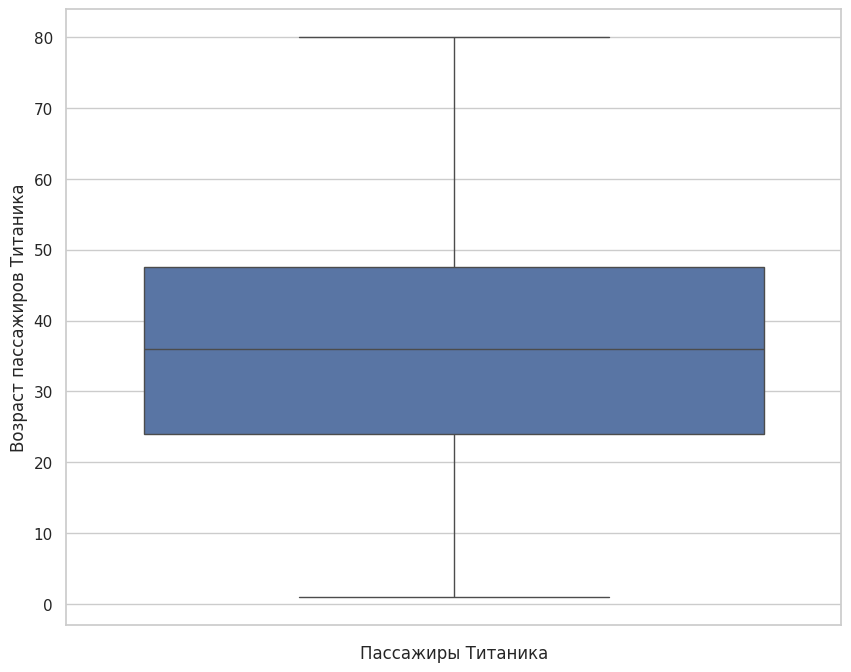

In [ ]:
sns.set(style="whitegrid")

variable = df['Age']
plt.xlabel('Пассажиры Титаника')
plt.ylabel('Возраст пассажиров Титаника')

sns.boxplot(y=variable);

### Проинтепретируйте полученный график - 1 балл

50% пассажиров Титаника было в зозрасте от ~24 до ~48 лет.
Медианным знаечение является ~35 лет.
Наименьшее значение ~0,5 лет, а  наибольшее - 80 лет.

### Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах - 1 балл

In [ ]:
labels= ['G1', 'G2', 'G3', 'G4', 'G5']
value = [12, 22, 16, 38, 12]
fig, ax = plt.subplots()
ax.pie(value, labels=labels, autopct= ' %1.1f%%');

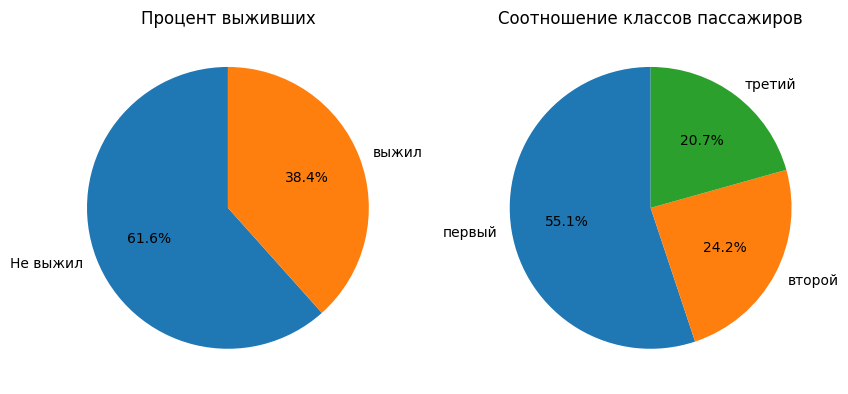

In [ ]:
# Круговая диаграмма для Survived
survived_counts = df['Survived'].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, 1 ячейка
plt.pie(survived_counts, labels=['Не выжил', 'выжил'], autopct='%1.1f%%', startangle=90)
plt.title('Процент выживших')

# Круговая диаграммы для Pclass
pclass_counts = df['Pclass'].value_counts()
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, 2 ячейка
plt.pie(pclass_counts, labels=['первый', 'второй', 'третий'], autopct='%1.1f%%', startangle=90)
plt.title('Соотношение классов пассажиров')

plt.show()


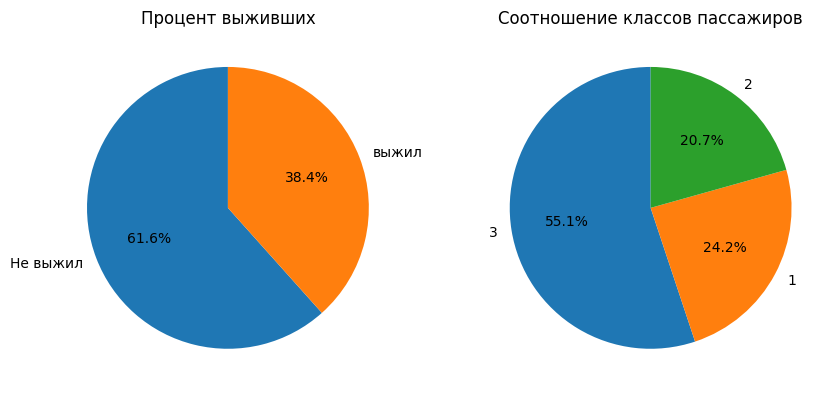

In [ ]:
# Круговая диаграмма для Survived
survived_counts = df['Survived'].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, 1 ячейка
plt.pie(survived_counts, labels=['Не выжил', 'выжил'], autopct='%1.1f%%', startangle=90)
plt.title('Процент выживших')

# Круговая диаграммы для Pclass
pclass_counts = df['Pclass'].value_counts()
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, 2 ячейка
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение классов пассажиров')

plt.show()


### Постройте график типа pairplot для всех числовых переменных датасета - 1 балл

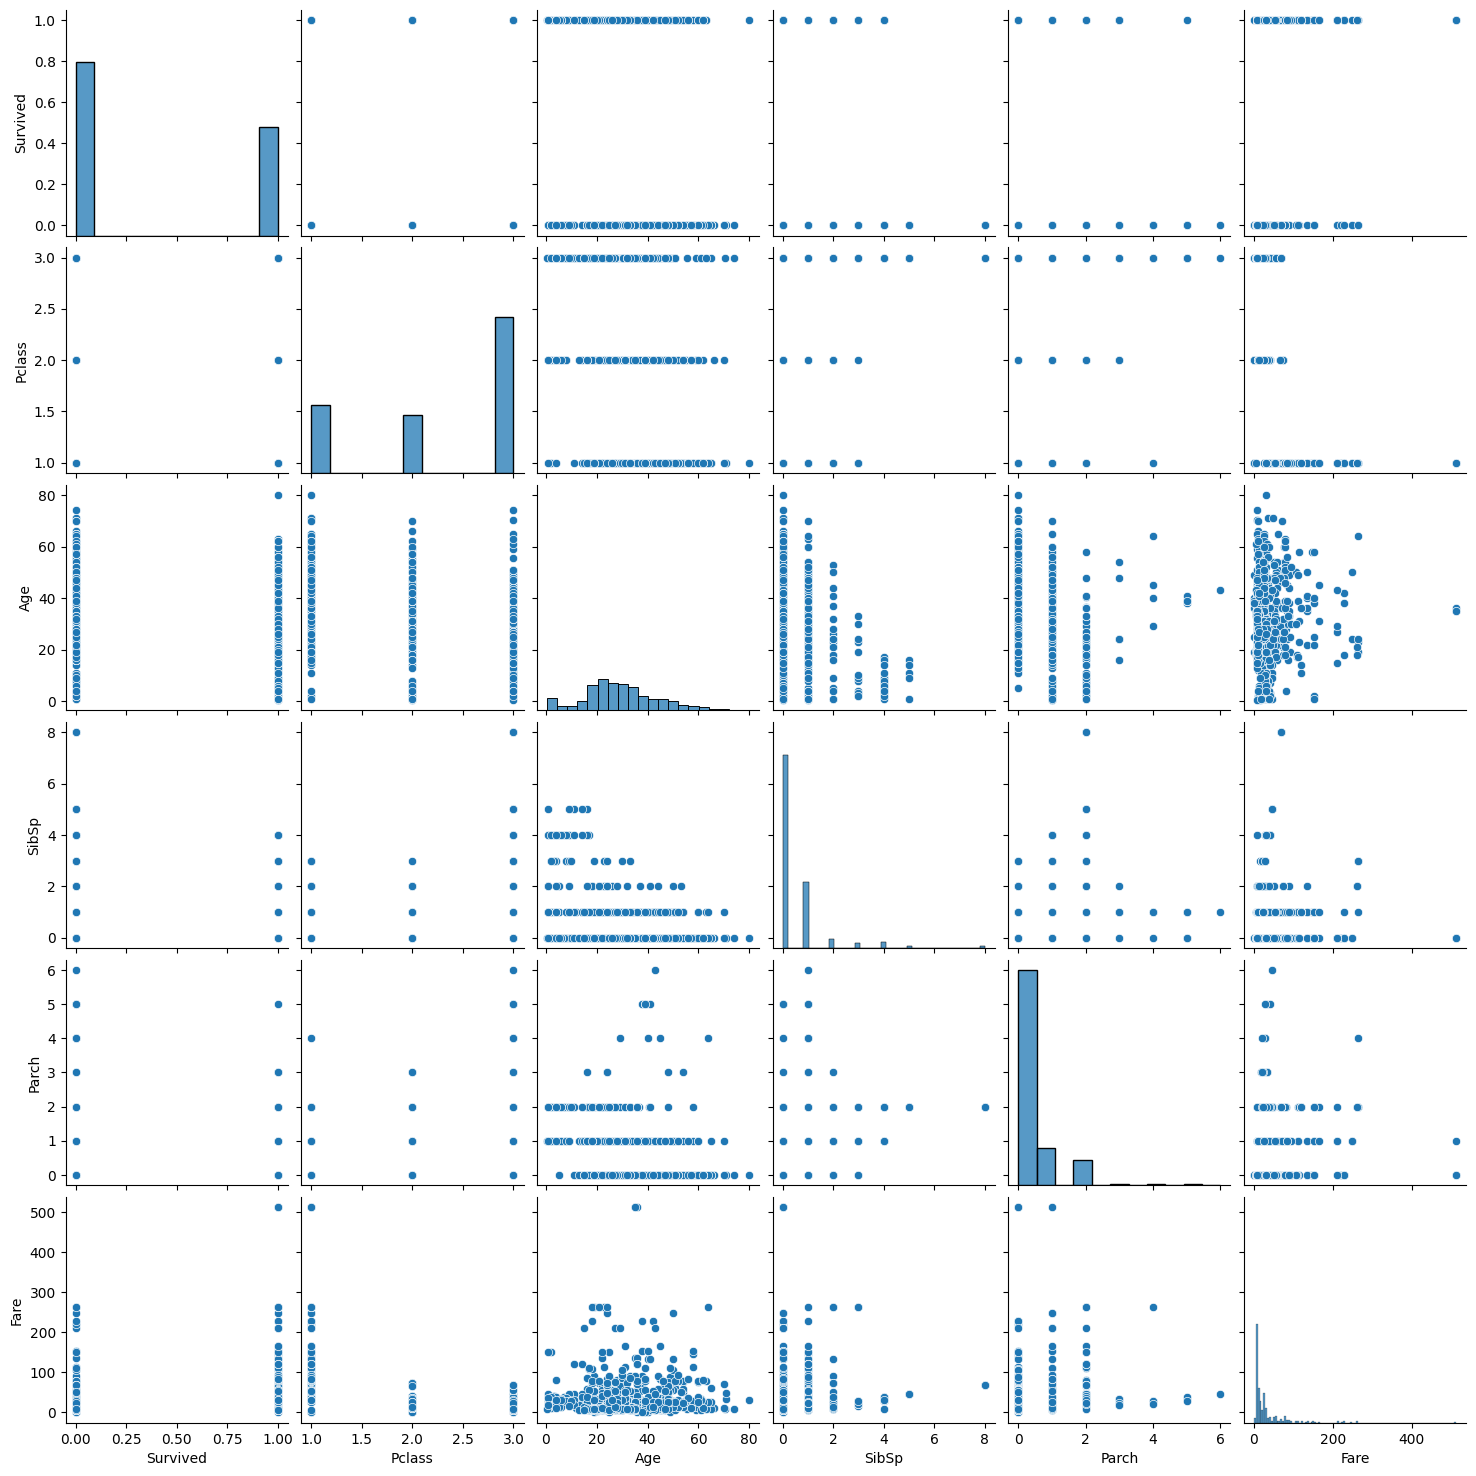

In [ ]:
data_for_pairplot = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

sns.pairplot(data_for_pairplot)
plt.show()


### Постройте интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе - 2 балла

In [ ]:
import plotly.express as px
sunburst_data = df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')


fig = px.sunburst(sunburst_data,
                  path=['Pclass', 'Sex'],
                  values='Count',
                  title='Распределение пассажиров Титаника по классам и полу')

fig.show()
